In [2]:
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
from IPython.display import display, Javascript, Image
from base64 import b64decode, b64encode
import numpy as np
import cv2
import io
import torch
import os
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from tensorflow import keras
import seaborn as sns

In [ ]:
#@title Default title text

import pandas as pd
df = pd.read_excel('2003_2017_waste.xlsx')
df.dropna(inplace = True)
df.shape
df

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100,791000,0.14,2016
1,Paper/Cardboard,576000,607100,1183100,0.51,2016
2,Plastics,762700,59500,822200,0.07,2016
3,C&D,9700,1585700,1595400,0.99,2016
4,Horticultural waste,111500,209000,320500,0.65,2016
...,...,...,...,...,...,...
220,Ash and sludge,214800,28600,243400,0.12,2017
221,Plastic,763400,51800,815200,0.06,2017
222,Textile/Leather,141200,9600,150800,0.06,2017
223,"Others (stones, ceramic, rubber, etc.)",319300,7100,326400,0.02,2017


In [ ]:
print(df.describe())
df_required = df['total_waste_generated_tonne']
length = len(df['year'].values)
each_year = length / 15
each_year
Sum = 0
li = []
for i in range(df.shape[0]):
  df_required.values[i]
  if (i+1) % 15 == 0 and i > 0:
    li.append(Sum)
    Sum = 0
  else:
    Sum += df_required.values[i]
print(li)
li.insert(0, li[len(li)-1])
li.pop()
li_new = li.copy()
li_new.reverse()
print(li_new)

       waste_disposed_of_tonne  total_waste_recycled_tonne  \
count             2.250000e+02                2.250000e+02   
mean              3.697191e+05                4.896987e+05   
std               6.842470e+05                9.607678e+05   
min               1.300000e+03                0.000000e+00   
25%               2.460000e+04                1.830000e+04   
50%               1.062000e+05                9.110000e+04   
75%               5.000000e+05                5.200000e+05   
max               3.045200e+06                4.825900e+06   

       total_waste_generated_tonne  recycling_rate         year  
count                 2.250000e+02      225.000000   225.000000  
mean                  8.594173e+05        0.481778  2010.000000  
std                   1.579112e+06        0.365106     4.330127  
min                   1.440000e+04        0.000000  2003.000000  
25%                   1.184000e+05        0.110000  2006.000000  
50%                   3.324000e+05        0.4

In [ ]:
df_required1 = df['total_waste_recycled_tonne']
length = len(df['year'].values)
each_year = length / 15
each_year
Sum1 = 0
li1 = []
year = []
for i in range(df.shape[0]):
  df_required1.values[i]
  if (i+1) % 15 == 0 and i > 0:
    year.append(df.iloc[i-1]['year'])
    li1.append(Sum1)
    Sum1 = 0
  else:
    Sum1 += df_required1.values[i]
li1.insert(0,li1[len(li1)-1])
li1.pop()
li1_new = li1.copy()
li1_new.reverse()
year.insert(0,year[len(year)-1])
year.pop()
year_new = year.copy()
year_new.reverse()
print(li1_new)
print(year_new)

[2223200, 2307100, 2469400, 2656900, 3034800, 3342600, 3485200, 3757500, 4038800, 4335600, 4825900, 4471100, 4649700, 4769000, 4724300]
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


[4728200 4789700 5018200 5220500 5600800 5970200 6114100 6517000 6898300
 7269500 7851500 7514400 7673500 7814200 7704300]


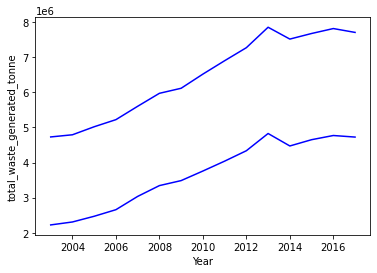

In [ ]:
arr = np.array(li_new)
arr1 = np.array(li1_new)
print(arr)
plt.plot(year_new,arr,year_new, arr1, color='blue')
plt.ylabel("total_waste_generated_tonne")
plt.xlabel("Year")
plt.show()

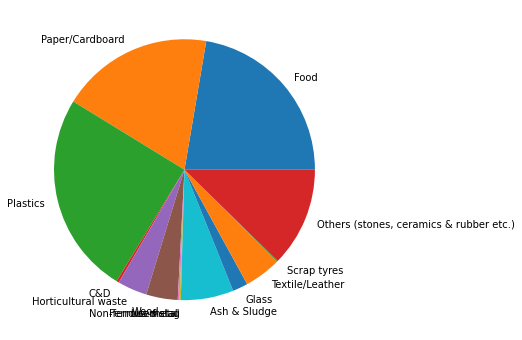

In [ ]:
y = np.array(df.iloc[0:14]['waste_disposed_of_tonne'])
plt.figure(figsize=(19,6))
plt.pie(y, labels= df.iloc[0:14]['waste_type'])
plt.show()

[4728200 4789700 5018200 5220500 5600800 5970200 6114100 6517000 6898300
 7269500 7851500 7514400 7673500 7814200 7704300]


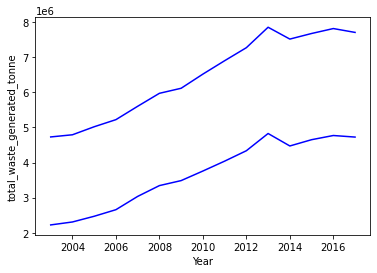

In [ ]:
import numpy as np
arr = np.array(li_new)
arr1 = np.array(li1_new)
print(arr)
plt.plot(year_new,arr,year_new, arr1, color='blue')
x = plt.ylabel("total_waste_generated_tonne")
y = plt.xlabel("Year")
plt.show()